In [1]:
import numpy as np
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [2]:
#定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR。matplotlib可视化格式为RGB，因此需将BGR转化为RGB'''
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [3]:
seg = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection = 0)

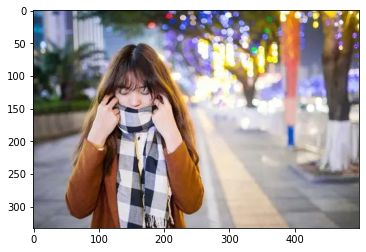

In [4]:
img = cv2.imread('./images/Camera2.jpg')
look_img(img)

In [5]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = seg.process(img_RGB)

In [6]:
results.segmentation_mask

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.1099712e-33, 2.2717124e-33, 6.7621621e-34, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.7525032e-33, 2.0105960e-33, 5.9849023e-34, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.6377813e-28, 1.9267960e-28, 5.7354567e-29, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9428700e-22, 1.4191906e-22, 4.2244773e-23, ..., 1.2503883e-30,
        4.3067155e-31, 0.0000000e+00],
       [5.6015213e-22, 4.0916923e-22, 1.2179661e-22, ..., 3.6050155e-30,
        1.2416762e-30, 0.0000000e+00]], dtype=float32)

In [7]:
mask = results.segmentation_mask.astype('uint8')

In [8]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

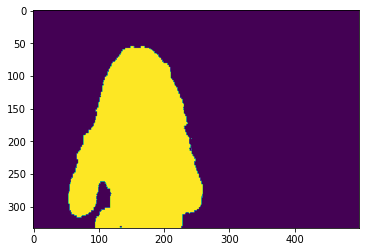

In [9]:
plt.imshow(mask)

### 获取三通道逻辑符号的mask

In [10]:
mask.shape

(333, 499)

In [11]:
#  将3张单通道的图片进行叠加
#  单通道转三通道

mask_3 = np.stack((mask,mask,mask),axis = -1)

In [12]:
mask_3.shape

(333, 499, 3)

In [13]:
mask_3 = mask_3 > 0.1
mask_3

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

### 更换背景颜色

In [14]:
mask_color = [0,200,0]
fg_image = np.zeros(img.shape,dtype = np.uint8)
fg_image[:] = mask_color

In [15]:
fg_image

array([[[  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0],
        ...,
        [  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0]],

       [[  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0],
        ...,
        [  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0]],

       [[  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0],
        ...,
        [  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0]],

       ...,

       [[  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0],
        ...,
        [  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0]],

       [[  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0],
        ...,
        [  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0]],

       [[  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0],
        ...,
        [  0, 200,   0],
        [  0, 200,   0],
        [  0, 200,   0]]

In [16]:
#  获得前景人像
fg_img = np.where(mask_3,img,fg_image)

In [17]:
#  获得扣掉前景人像的背景
bg_img = np.where(~mask_3,img,fg_image)

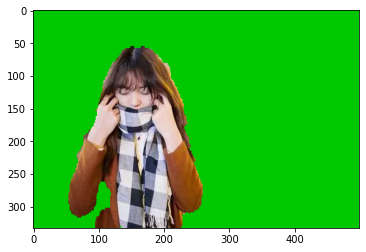

In [18]:
look_img(fg_img)

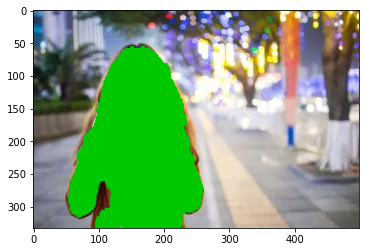

In [19]:
look_img(bg_img)

### 更换背景图片

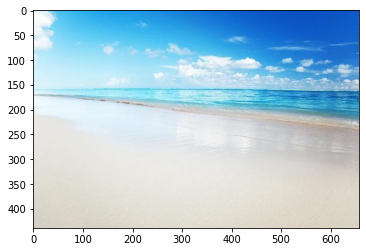

In [20]:
bkgd_img = cv2.imread('./images/Camera3.jpg')
look_img(bkgd_img)

In [21]:
bkgd_img.shape

(439, 658, 3)

In [22]:
## 注意背景图片的长宽应该大于原始人像图片的长宽

In [23]:
# 从新背景图中切出原图大小的图块
# 高度方向（Y方向）
bottom = bkgd_img.shape[0]
top = bottom - img.shape[0]

# 宽度方向（x方向）
left = bkgd_img.shape[1]//2-img.shape[1]//2  #从x方向中点向左偏移原始人像图片一半
right = left + img.shape[1]

In [24]:
print('左上角坐标：',top,left)
print('右下角坐标：',bottom,right)

左上角坐标： 106 80
右下角坐标： 439 579


In [25]:
new_bkgd = bkgd_img[top:bottom,left:right,:]

In [26]:
# 抠出来的图块和原来人像图片长宽一致
new_bkgd.shape

(333, 499, 3)

In [27]:
img.shape

(333, 499, 3)

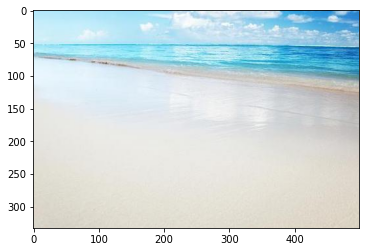

In [28]:
look_img(new_bkgd)

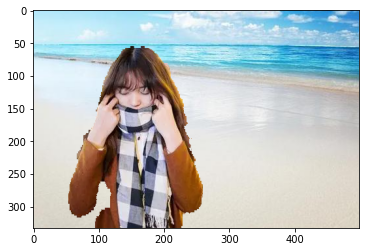

In [29]:
## 将mask_3定义的人像区加在新图块上
# np.where(condition,A,B)  符合condition返回A，不符合返回B

new_bkgd_mask_img = np. where(mask_3, img, new_bkgd)
look_img(new_bkgd_mask_img)

In [30]:
# 将完整背景对应的图块区域更换为加了人像的图块
bkgd_img[top:bottom,left:right,:] = new_bkgd_mask_img

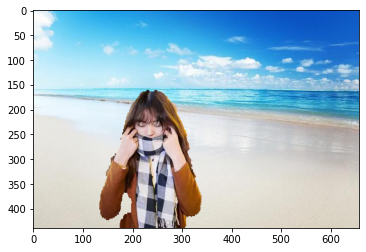

In [31]:
look_img(bkgd_img)

### 整理代码

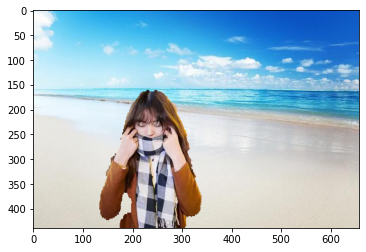

In [32]:
import numpy as np
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

#定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR。matplotlib可视化格式为RGB，因此需将BGR转化为RGB'''
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
seg = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection = 0)
img = cv2.imread('./images/Camera2.jpg')

img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
bkgd_img = cv2.imread('./images/Camera3.jpg')

# 将RGB图像输入模型，获取预测结果
results = seg.process(img_RGB)

mask = results.segmentation_mask.astype('uint8')

mask_3 = np.stack((mask,mask,mask),axis = -1)
mask_3 = mask_3 > 0.1

# 从新背景图中切出原图大小的图块
# 高度方向（Y方向）
bottom = bkgd_img.shape[0]
top = bottom - img.shape[0]

# 宽度方向（x方向）
left = bkgd_img.shape[1]//2-img.shape[1]//2  #从x方向中点向左偏移原始人像图片一半
right = left + img.shape[1]

new_bkgd = bkgd_img[top:bottom,left:right]

## 将mask_3定义的人像区加在新图块上
# np.where(condition,A,B)  符合condition返回A，不符合返回B
new_bkgd_mask_img = np. where(mask_3, img, new_bkgd)

# 将完整背景对应的图块区域更换为加了人像的图块
bkgd_img[top:bottom,left:right,:] = new_bkgd_mask_img
look_img(bkgd_img)
